In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
import requests
import time
from scipy.stats import linregress

In [2]:
#read oil csv
oil = pd.read_csv("data/Crude_Oil_Prices.csv")
oil = oil.filter(["Month","Year","Crude Oil Domestic First Purchase Price (Dollars per Barrel)","M/M Change"])
oil = oil.dropna()
oil = oil[oil["Year"]>=1978]
oil['Year'] = oil['Year'].apply(int)
oil['Year'] = oil['Year'].apply(str)
oil['Month'] = oil['Month'].apply(str)
oil['Year/Month'] = oil['Year'].str.cat(oil['Month'],sep=".")
oil

,Month,Year,Crude Oil Domestic First Purchase Price (Dollars per Barrel),M/M Change,Year/Month
75,1,1978,8.71,-0.1,1978.1
76,2,1978,8.86,0.15,1978.2
77,3,1978,8.8,-0.06,1978.3
78,4,1978,8.82,0.02,1978.4
79,5,1978,8.81,-0.01,1978.5
...,...,...,...,...,...
575,9,2019,55.07,1.44,2019.9
576,10,2019,53.14,-1.93,2019.10
577,11,2019,54.96,1.82,2019.11
578,12,2019,58.41,3.45,2019.12


In [3]:
#read gas csv
gas = pd.read_csv("data/national_fuel_avgs.csv")
gas = gas.dropna()
gas['Year'] = gas['Year'].apply(str)
gas['Month'] = gas['Month'].apply(str)
gas['Year/Month'] = gas['Year'].str.cat(gas['Month'],sep=".")
gas

,Year,Month,Gas Monthly Avg,Year/Month
0,2000,1,1.27880,2000.1
1,2000,2,1.37050,2000.2
2,2000,3,1.49825,2000.3
3,2000,4,1.43650,2000.4
4,2000,5,1.45640,2000.5
...,...,...,...,...
240,2020,1,2.45900,2020.1
241,2020,2,2.34800,2020.2
242,2020,3,2.12560,2020.3
243,2020,4,1.72100,2020.4


In [4]:
oil["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"] = pd.to_numeric(oil["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"], errors='coerce')
oil.dtypes

Month                                                            object
Year                                                             object
Crude Oil Domestic First Purchase Price (Dollars per Barrel)    float64
M/M Change                                                       object
Year/Month                                                       object
dtype: object

In [5]:
gas.dtypes

Year                object
Month               object
Gas Monthly Avg    float64
Year/Month          object
dtype: object

In [6]:
merge = pd.merge(gas, oil, on="Year/Month")
merge = merge.dropna()
merge.head()

,Year_x,Month_x,Gas Monthly Avg,Year/Month,Month_y,Year_y,Crude Oil Domestic First Purchase Price (Dollars per Barrel),M/M Change
0,2000,1,1.27880,2000.1,1,2000,23.53,0.98
1,2000,2,1.37050,2000.2,2,2000,25.48,1.95
2,2000,3,1.49825,2000.3,3,2000,26.19,0.71
3,2000,4,1.43650,2000.4,4,2000,23.20,-2.99
4,2000,5,1.45640,2000.5,5,2000,25.58,2.38


C:\Users\Admin\Anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


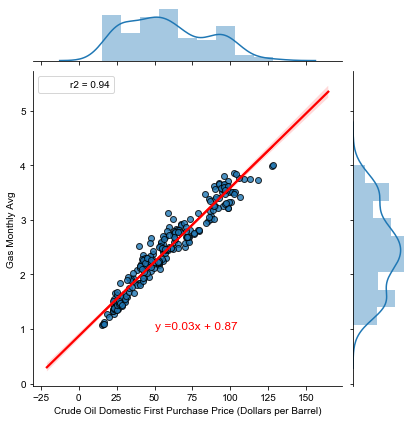

In [7]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Gas Monthly Avg", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

sns.set_style('whitegrid')

#Linear Regression
x_values = merge["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge["Gas Monthly Avg"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=12,color="red")

# Save plot
fig.savefig("Gas vs first.png", dpi=200)

In [8]:
#read gas csv
plane = pd.read_csv("data/Airfares.csv")
plane = plane.dropna()
plane['Year'] = plane['Year'].apply(str)
plane['Month'] = plane['Month'].apply(str)
plane['Year/Month'] = plane['Year'].str.cat(plane['Month'],sep=".")
plane

,Year,Month,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $),Year/Month
0,2000,1,340.23,514.89,2000.1
1,2000,2,340.23,514.89,2000.2
2,2000,3,340.23,514.89,2000.3
3,2000,4,339.16,507.91,2000.4
4,2000,5,339.16,507.91,2000.5
...,...,...,...,...,...
235,2019,8,345.09,345.83,2019.8
236,2019,9,345.09,345.83,2019.9
237,2019,10,356.51,356.51,2019.10
238,2019,11,356.51,356.51,2019.11


In [9]:
merge4 = pd.merge(plane, oil, on="Year/Month")
merge4 = merge4.dropna()
merge4.dtypes

Year_x                                                           object
Month_x                                                          object
U.S. Average (Current $)                                        float64
U.S. Average (Inflation-Adjusted $)                             float64
Year/Month                                                       object
Month_y                                                          object
Year_y                                                           object
Crude Oil Domestic First Purchase Price (Dollars per Barrel)    float64
M/M Change                                                       object
dtype: object

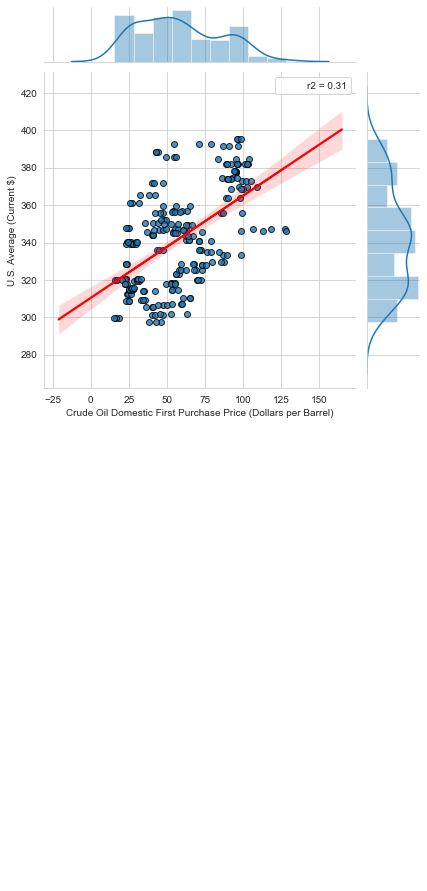

In [10]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="U.S. Average (Current $)", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge4, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

sns.set_style('whitegrid')

#Linear Regression
x_values = merge4["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge4["U.S. Average (Current $)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-2),fontsize=12,color="red")

# Save plot
fig.savefig("Airfares vs first.png", dpi=200)

In [11]:
#read economic csv
econ = pd.read_csv("data/inflation_recession_ue.csv")
econ = econ.dropna()
econ

,Month,Year,Recession,Adj Month,Adj Year,Unemployment,UE M/M,Inflation Rate,Inflation M/M
0,1,1978,Growth,12,1977,6.4,0.0,6.8,0.3
1,2,1978,Growth,1,1978,6.3,-0.1,6.4,-0.4
2,3,1978,Growth,2,1978,6.3,0.0,6.6,0.2
3,4,1978,Growth,3,1978,6.1,-0.2,6.5,-0.1
4,5,1978,Growth,4,1978,6.0,-0.1,7.0,0.5
...,...,...,...,...,...,...,...,...,...
503,12,2019,Growth,11,2019,3.5,0.0,2.3,0.2
504,1,2020,Growth,12,2019,3.6,0.1,2.5,0.2
505,2,2020,Growth,1,2020,3.5,-0.1,2.3,-0.2
506,3,2020,Recession,2,2020,4.4,0.9,1.5,-0.8


In [12]:
econ['Adj Year'] = econ['Adj Year'].apply(str)
econ['Adj Month'] = econ['Adj Month'].apply(str)
econ['A Year/Month'] = econ['Adj Year'].str.cat(econ['Adj Month'],sep=".")
econ['Year'] = econ['Year'].apply(str)
econ['Month'] = econ['Month'].apply(str)
econ['Year/Month'] = econ['Year'].str.cat(econ['Month'],sep=".")
econ

,Month,Year,Recession,Adj Month,Adj Year,Unemployment,UE M/M,Inflation Rate,Inflation M/M,A Year/Month,Year/Month
0,1,1978,Growth,12,1977,6.4,0.0,6.8,0.3,1977.12,1978.1
1,2,1978,Growth,1,1978,6.3,-0.1,6.4,-0.4,1978.1,1978.2
2,3,1978,Growth,2,1978,6.3,0.0,6.6,0.2,1978.2,1978.3
3,4,1978,Growth,3,1978,6.1,-0.2,6.5,-0.1,1978.3,1978.4
4,5,1978,Growth,4,1978,6.0,-0.1,7.0,0.5,1978.4,1978.5
...,...,...,...,...,...,...,...,...,...,...,...
503,12,2019,Growth,11,2019,3.5,0.0,2.3,0.2,2019.11,2019.12
504,1,2020,Growth,12,2019,3.6,0.1,2.5,0.2,2019.12,2020.1
505,2,2020,Growth,1,2020,3.5,-0.1,2.3,-0.2,2020.1,2020.2
506,3,2020,Recession,2,2020,4.4,0.9,1.5,-0.8,2020.2,2020.3


In [13]:
merge2 = pd.merge(econ, oil, on="Year/Month")
merge2 = merge2.dropna()
merge2

,Month_x,Year_x,Recession,Adj Month,Adj Year,Unemployment,UE M/M,Inflation Rate,Inflation M/M,A Year/Month,Year/Month,Month_y,Year_y,Crude Oil Domestic First Purchase Price (Dollars per Barrel),M/M Change
0,1,1978,Growth,12,1977,6.4,0.0,6.8,0.3,1977.12,1978.1,1,1978,8.71,-0.1
1,2,1978,Growth,1,1978,6.3,-0.1,6.4,-0.4,1978.1,1978.2,2,1978,8.86,0.15
2,3,1978,Growth,2,1978,6.3,0.0,6.6,0.2,1978.2,1978.3,3,1978,8.80,-0.06
3,4,1978,Growth,3,1978,6.1,-0.2,6.5,-0.1,1978.3,1978.4,4,1978,8.82,0.02
4,5,1978,Growth,4,1978,6.0,-0.1,7.0,0.5,1978.4,1978.5,5,1978,8.81,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,9,2019,Growth,8,2019,3.5,-0.2,1.7,0.0,2019.8,2019.9,9,2019,55.07,1.44
501,10,2019,Growth,9,2019,3.6,0.1,1.8,0.1,2019.9,2019.10,10,2019,53.14,-1.93
502,11,2019,Growth,10,2019,3.5,-0.1,2.1,0.3,2019.10,2019.11,11,2019,54.96,1.82
503,12,2019,Growth,11,2019,3.5,0.0,2.3,0.2,2019.11,2019.12,12,2019,58.41,3.45


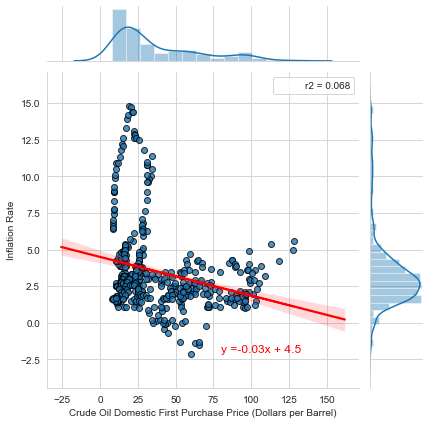

In [14]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Inflation Rate", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge2, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

sns.set_style('whitegrid')

#Linear Regression
x_values = merge2["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge2["Inflation Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-2),fontsize=12,color="red")

# Save plot
fig.savefig("Inflation Rate vs first.png", dpi=200)

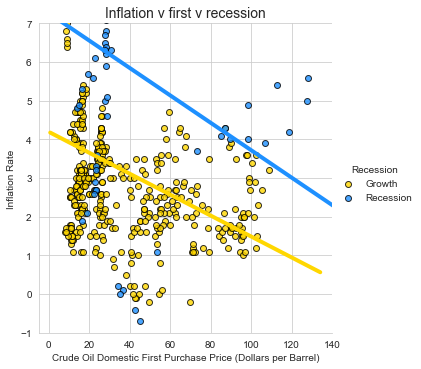

In [15]:
color_dict = dict({'Recession': "dodgerblue",
                   'Growth': "gold"
                  })

#Scatter and regression on the entire sample to show singular trend and R-Square  
# set gridmarks 
sns.set_style('whitegrid')

# create basic scatterplot
fig = sns.lmplot( x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", y="Inflation Rate", hue="Recession", data=merge2, palette=color_dict, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={"lw":4})
plt.title("Inflation v first v recession", size=14)

# Set axis limits
plt.ylim(-1, 7)
plt.xlim(-5, 140)

# Show plot
plt.show()

# Save plot
fig.savefig("Inflation vs first v recession.png", dpi=200)

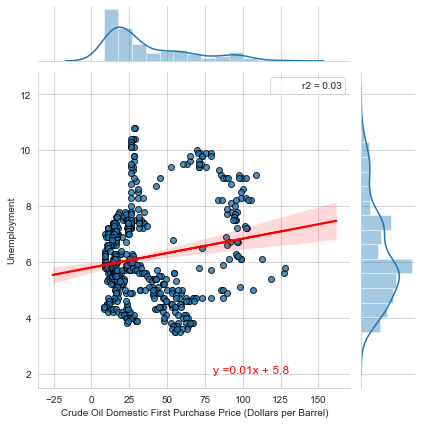

In [16]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Unemployment", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge2, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge2["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge2["Unemployment"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,2),fontsize=12,color="red")

# Save plot
fig.savefig("Unemployment vs first.png", dpi=200)

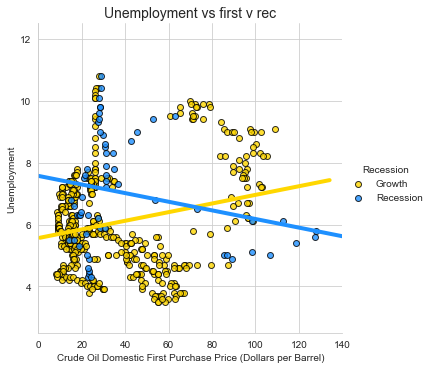

In [17]:
color_dict = dict({'Recession': "dodgerblue",
                   'Growth': "gold"
                  })

#Scatter and regression on the entire sample to show singular trend and R-Square  
# set gridmarks 
sns.set_style('whitegrid')

# create basic scatterplot
fig = sns.lmplot( x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", y="Unemployment", hue="Recession", data=merge2, palette=color_dict, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={"lw":4})
plt.title("Unemployment vs first v rec", size=14)

# Set axis limits
plt.ylim(2.5, 12.5)
plt.xlim(0, 140)

# Show plot
plt.show()

# Save plot
fig.savefig("Unemployment vs first v rec.png", dpi=200)

In [18]:
#read food csv
food = pd.read_csv("data/food_commodities.csv")
food = food.dropna()

food['Year'] = food['Year'].apply(str)
food['Month'] = food['Month'].apply(str)
food['Year/Month'] = food['Year'].str.cat(food['Month'],sep=".")
food

merge3 = pd.merge(food, oil, on="Year/Month")
merge3 = merge3.dropna()
merge3.dtypes

Year_x                                                           object
Month_x                                                          object
Average of Wheat Value                                          float64
Average of Soybean Value                                        float64
Year/Month                                                       object
Month_y                                                          object
Year_y                                                           object
Crude Oil Domestic First Purchase Price (Dollars per Barrel)    float64
M/M Change                                                       object
dtype: object

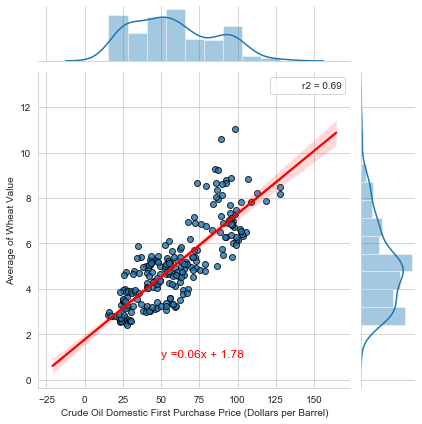

In [19]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Average of Wheat Value", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge3, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge3["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge3["Average of Wheat Value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=12,color="red")

# Save plot
fig.savefig("wheat vs first.png", dpi=200)

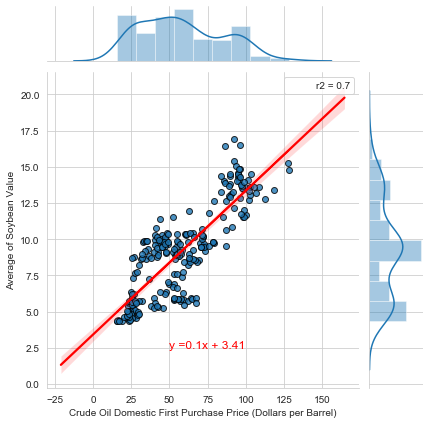

In [20]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Average of Soybean Value", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge3, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge3["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge3["Average of Soybean Value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,2.5),fontsize=12,color="red")

# Save plot
fig.savefig("soy vs first.png", dpi=200)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#["Landed Cost of Crude Oil Imports (Dollars per Barrel)"]
#y_values = merge["Gas Monthly Avg"]

In [36]:
X = merge2[['Inflation Rate', 'Unemployment', 'Crude Oil Domestic First Purchase Price (Dollars per Barrel)']]
y = merge2["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(505, 3) (505, 1)


In [37]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### END SOLUTION

In [38]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [39]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


Text(0.5, 1.0, 'Residual Plot')

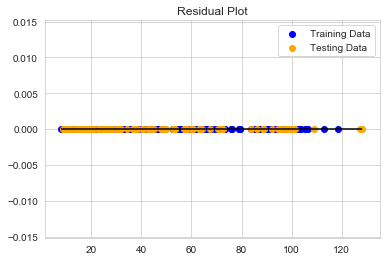

In [40]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 9.911074491107452e-29
R-squared (R2 ): 1.0


TEST

best results - merge2
X: 
Inflation Rate                                                  float64
Unemployment                                                    float64
Crude Oil Domestic First Purchase Price (Dollars per Barrel)    float64


Y: 
Year/Month                                                       object

In [23]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = merge2[['Inflation Rate', 'Unemployment', 'Crude Oil Domestic First Purchase Price (Dollars per Barrel)']]
y = merge2["Year/Month"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(505, 3) (505, 1)


In [24]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [26]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [27]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

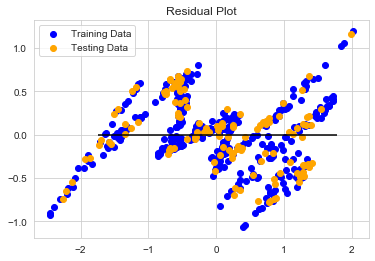

In [28]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [29]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15387897590026506, R2: 0.8716133420631089


In [30]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15721052395162463, R2: 0.8688337139978205


In [31]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.153882677257659, R2: 0.8716102538900635


In [32]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15624591404971014, R2: 0.869638522067247
